# Key Financial Metrics Analysis of S&P 500 Stocks

Author: Leander von Schönfeld

Email: leander.von.schoenfeld@studium.uni-hamburg.de

LinkedIn: [https://www.linkedin.com/in/leander-von-schoenfeld/](https://www.linkedin.com/in/leander-von-schoenfeld/)

Course Project, UC Irvine, Math 10, F22

## Introduction

With this project I want to analyze different properties of the S&P 500 stock index using stock data from the last 12 years and current valuation multiples. The main topics will be to evaluate whether you can classify the sector of a stock using key financial metrics, to predict the five year movement of a stock using valuation multiples and vice versa and a small time series analysis predicting stock prices of stocks from the utilities sector.

## Loading our datasets and cleaning them up

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import altair as alt
import numpy as np

First we import our datasets and get a feeling for the data by looking at their first rows.

In [2]:
prices=pd.read_csv("sp500_stocks.csv")
prices.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0


In [3]:
multiples=pd.read_csv("financials.csv")
multiples.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


We want to find all companies, where the data is incomplete, and get rid of these companies in our dataset.

In [4]:
miss_val=multiples[multiples.isna().any(axis=1)]["Symbol"]
miss_val

55     ARNC
199      FL
225     HCA
292     MRO
346     OXY
358     PEP
360    PRGO
430     TPR
450     TDG
460     UNP
Name: Symbol, dtype: object

In [5]:
multiples_true = multiples.dropna()
multiples_true

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
len(miss_val)==len(multiples)-len(multiples_true)

True

As we see there are 10 companies with missing data. We check that dropna works correctly, by seeing if the number of rows in our new dataframe are the same.

Next we only focus on Adjusted Closing Dates in our prices dataset because we look for longterm trends and in the difference between the adjusted closing price and the other prices is quite small on average. Therefore we drop all other rows.

In [7]:
prices_adj = prices.drop(["Close", "High", "Low", "Open", "Volume"], axis=1).dropna()
prices_adj.head()

,Date,Symbol,Adj Close
0,2010-01-04,MMM,59.318886
1,2010-01-05,MMM,58.947342
2,2010-01-06,MMM,59.783295
3,2010-01-07,MMM,59.826176
4,2010-01-08,MMM,60.247749


Next we want to get rid of all stocks, where some of the data about the financial statements is missing and therefore drop these rows.

In [8]:
prices_true=prices_adj[~prices_adj["Symbol"].isin(miss_val)]
prices_true

,Date,Symbol,Adj Close
0,2010-01-04,MMM,59.318886
1,2010-01-05,MMM,58.947342
2,2010-01-06,MMM,59.783295
3,2010-01-07,MMM,59.826176
4,2010-01-08,MMM,60.247749
...,...,...,...
1633739,2022-11-18,ZTS,145.639999
1633740,2022-11-21,ZTS,147.330002
1633741,2022-11-22,ZTS,148.630005
1633742,2022-11-23,ZTS,150.470001


## Plotting the S&P 500 index normed at year 2010

We want to get a feeling for how the S&P 500 developed over the years, using just our data. We add a year column but also put the symbol into the year column so that we can still match the data of the respective stocks together.

In [9]:
prices_sectors = prices_true.copy()
prices_sectors["Year"] = prices_sectors.Date.str[0:4]+ ' ' + prices_sectors['Symbol']
prices_sectors.head()

,Date,Symbol,Adj Close,Year
0,2010-01-04,MMM,59.318886,2010 MMM
1,2010-01-05,MMM,58.947342,2010 MMM
2,2010-01-06,MMM,59.783295,2010 MMM
3,2010-01-07,MMM,59.826176,2010 MMM
4,2010-01-08,MMM,60.247749,2010 MMM


To see an overall trend we use the first stock price of every stock and every year.

In [10]:
prices_sectors.drop_duplicates(subset ='Year', keep ='first', inplace =True)
prices_sectors.drop(["Date"],axis=1,inplace=True)
prices_sectors

,Symbol,Adj Close,Year
0,MMM,59.318886,2010 MMM
252,MMM,63.603325,2011 MMM
504,MMM,62.773624,2012 MMM
754,MMM,73.182358,2013 MMM
1006,MMM,109.054214,2014 MMM
...,...,...,...
1632509,ZTS,69.990440,2018 ZTS
1632760,ZTS,82.876381,2019 ZTS
1633012,ZTS,132.432312,2020 ZTS
1633265,ZTS,162.432663,2021 ZTS


Assume one stock is priced at 5 dollars per share and one stock is priced at 10 dollars per share but their market cap is equal. If we would just add all stock prices, the stock with less outstanding shares and a higher share price is weighted more in the calculation. Therefore we scale all stock prices to 100 for their first year in the S&P 500 to get a good feeling on how the S&P 500 developed over the last decade.

In [11]:
ser = prices_sectors.groupby("Symbol").first()["Adj Close"]
prices_sectors["temp"] = prices_sectors["Symbol"].map(lambda abb: ser[abb])
prices_sectors["Adj Close Norm"]=100*prices_sectors["Adj Close"]/prices_sectors["temp"]
prices_sectors.drop(["temp"],axis=1,inplace=True)
prices_sectors

,Symbol,Adj Close,Year,Adj Close Norm
0,MMM,59.318886,2010 MMM,100.000000
252,MMM,63.603325,2011 MMM,107.222723
504,MMM,62.773624,2012 MMM,105.824011
754,MMM,73.182358,2013 MMM,123.371093
1006,MMM,109.054214,2014 MMM,183.844003
...,...,...,...,...
1632509,ZTS,69.990440,2018 ZTS,240.943436
1632760,ZTS,82.876381,2019 ZTS,285.303534
1633012,ZTS,132.432312,2020 ZTS,455.900779
1633265,ZTS,162.432663,2021 ZTS,559.177564


In [12]:
f = lambda x: sum(prices_sectors["Adj Close Norm"][pd.to_numeric(prices_sectors["Year"].str[:4])==x])

In [13]:
g = lambda x: len(prices_sectors["Adj Close Norm"][pd.to_numeric(prices_sectors["Year"].str[:4])==x])

In [14]:
overall = [f(x)/g(x) for x in range(2010,2023)]
overall

[100.0,
 125.71174470297127,
 130.7469567085745,
 160.9021856202607,
 218.2566878000859,
 260.9022058217084,
 273.15436050027466,
 315.22020155526695,
 397.4428705257547,
 382.09487113487626,
 514.897322817739,
 654.9769290679288,
 867.8759189597679]

In [15]:
sp500 = pd.DataFrame()
sp500["Year"]=range(2010,2023)
sp500["Score"]=overall
sp500

,Year,Score
0,2010,100.000000
1,2011,125.711745
2,2012,130.746957
3,2013,160.902186
4,2014,218.256688
5,2015,260.902206
6,2016,273.154361
7,2017,315.220202
8,2018,397.442871
9,2019,382.094871


Using a seaborn plot, we see that the overall trend was very positive. But some market movements are not included in the chart because only yearly data is used (e.g. a bear market in early 2020 because of the Covid 19 pandemic). However the goal of the chart was to get an overall feeling.

<AxesSubplot: xlabel='Year', ylabel='Score'>

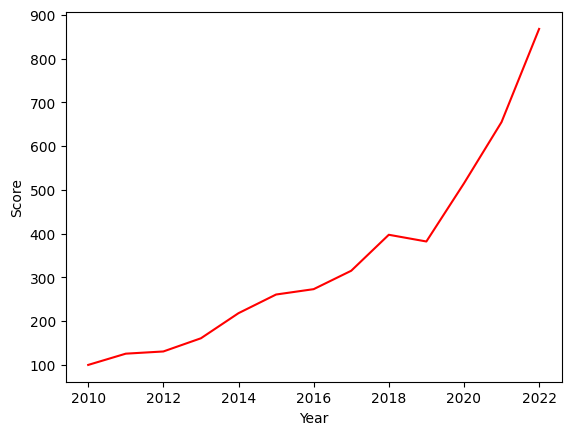

In [16]:
sns.lineplot(data=sp500, x="Year", y="Score", color="red")


## Merging our datasets

Now we want to merge our two datasets multiples_true and prices_sectors. We us the pivot method to do so. Also we get rid of the Adj Close Norm column and just use the adjusted closing prices. [Reference 1](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html) [Reference 2](https://pandas.pydata.org/docs/user_guide/reshaping.html)

In [17]:
mr = prices_sectors.copy()
realyear=[i[:4] for i in mr["Year"]]
mr["Real Year"]=realyear
mr.head()

,Symbol,Adj Close,Year,Adj Close Norm,Real Year
0,MMM,59.318886,2010 MMM,100.000000,2010
252,MMM,63.603325,2011 MMM,107.222723,2011
504,MMM,62.773624,2012 MMM,105.824011,2012
754,MMM,73.182358,2013 MMM,123.371093,2013
1006,MMM,109.054214,2014 MMM,183.844003,2014


In [18]:
mr=mr.pivot(index="Symbol",
         columns="Real Year",
         values= "Adj Close")

In [19]:
mr.head()

Real Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Symbol,,,,,,,,,,,,,
A,20.434929,27.342327,23.816809,27.615749,37.446896,38.134743,38.664230,44.659348,65.523422,64.262276,84.799675,118.001701,156.479996
AAL,4.496876,10.040195,4.826837,13.179525,23.907927,51.079918,39.095455,44.741226,51.647556,31.963160,28.982893,15.130000,18.750000
AAP,38.432693,62.621048,66.313416,69.793709,105.951363,153.358200,147.469162,165.506012,103.141106,153.790192,155.478271,154.917297,236.779999
AAPL,6.572423,10.121366,12.629211,17.010893,17.568449,24.819241,24.323219,27.413372,41.310070,38.439735,74.207466,128.997803,182.009995
ABBV,NaN,NaN,NaN,23.636871,36.381527,47.606876,42.991688,48.374146,79.061188,74.481514,80.137360,99.552361,134.029205


In [20]:
df = pd.merge(multiples_true, mr, on='Symbol')
df = df.sort_values(by=['Symbol'])
df.drop(["Price","52 Week Low", "52 Week High"],axis=1, inplace=True)
df.head()

,Symbol,Name,Sector,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,EBITDA,Price/Sales,Price/Book,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
11,A,Agilent Technologies Inc,Health Care,27.45,0.875698,2.10,2.198461e+10,1.094000e+09,6.493563,4.56,...,27.615749,37.446896,38.134743,38.664230,44.659348,65.523422,64.262276,84.799675,118.001701,156.479996
26,AAL,American Airlines Group,Industrials,9.92,0.778210,3.91,2.459485e+10,5.761000e+09,0.580226,6.03,...,13.179525,23.907927,51.079918,39.095455,44.741226,51.647556,31.963160,28.982893,15.130000,18.750000
7,AAP,Advance Auto Parts,Consumer Discretionary,19.54,0.218321,6.19,8.123612e+09,8.539410e+08,1.130106,2.51,...,69.793709,105.951363,153.358200,147.469162,165.506012,103.141106,153.790192,155.478271,154.917297,236.779999
41,AAPL,Apple Inc.,Information Technology,16.86,1.579541,9.20,8.095080e+11,7.938600e+10,3.458609,5.66,...,17.010893,17.568449,24.819241,24.323219,27.413372,41.310070,38.439735,74.207466,128.997803,182.009995
3,ABBV,AbbVie Inc.,Health Care,19.41,2.499560,3.29,1.813863e+11,1.031000e+10,6.291571,26.14,...,23.636871,36.381527,47.606876,42.991688,48.374146,79.061188,74.481514,80.137360,99.552361,134.029205


## Classifying stocks using the K-Means method

The first thing we want to do is, to see if we can predict, whether the sector of a stock is Real Estate, Industrials or Utilities, using the Price/Sales and the Dividend Yield multiple with the K-Means method. [Reference](https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas)

First let us have a look on how our data looks:

In [21]:
df2= df[df['Sector'].eq("Real Estate") | df['Sector'].eq("Utilities") | df['Sector'].eq("Industrials")]

In [22]:
brush = alt.selection_interval(encodings=["x","y"])

i1 = alt.Chart(df2).mark_circle().encode(
    x="Price/Sales",
    y="Dividend Yield",
    color=alt.condition(brush, "Sector:N", alt.value("green"))
).add_selection(brush) 

i2 = alt.Chart(df2).mark_bar().encode(
    x="Sector:N",
    y=alt.Y("count()", scale=alt.Scale(domain=[0,55])),
    color="Sector:N"
).transform_filter(brush)

alt.hconcat(i1,i2)

alt.HConcatChart(...)

When looking at the data and creating a brush, we clearly see, that there is at least some sort of characteristic properties for stocks from each sector. Industrials tend to have a low dividend yield and a low Price/Sales multiple, Utilities also have a low Price/Sales multiple, but their dividend yield is higher on average and Real Estate stocks have a high Price/Sales multiple. We want to use different machine learning techniques to see, how well these methods can classify given stocks.

First we use the K-Means method. We don't initialize centroids.

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=10, n_init=5, random_state=2)
kmeans.fit(df2[["Dividend Yield","Price/Sales"]])
kmeans.predict(df2[["Dividend Yield","Price/Sales"]])

array([0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
cluster = kmeans.predict(df2[["Dividend Yield","Price/Sales"]])

Now we want to test whether our results from the prediction using K-Means are actually correct. We use a dictionary and list comprehension to do so. [Reference](https://stackoverflow.com/questions/63697847/changing-label-names-of-kmean-clusters)

In [25]:
mapping = {0:'Industrials', 1:'Real Estate', 2:'Utilities'}
df2["temp"] = [mapping[i] for i in cluster]
df2["prediction"]=df2["Sector"]==df2["temp"]

Let's do a chart that shows how well the K-Means algorithm performed.

In [26]:
c2 = alt.Chart(df2).mark_circle().encode(
    x="Price/Sales",
    y="Dividend Yield",
    color="prediction:N"
)
c2

alt.Chart(...)

We see, the algorithm worked quite well. To evaluate how good it worked, we can do the following calculation:

In [27]:
len(df2[df2["prediction"]])/len(df2)

0.8653846153846154

The algorithm predicted 86.5% of the stocks correctly. Let's see if a decision tree works better and how we can avoid overfitting.

## Classifying stocks using decision trees

In [28]:
from sklearn.model_selection import train_test_split
X = df2[["Price/Sales","Dividend Yield"]]
y = df2["Sector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [30]:
clf.score(X_train,y_train)

0.9247311827956989

In [31]:
clf.score(X_test, y_test)

0.8181818181818182

Using max_leaf_nodes=5, the performance on our test set is much worse than on the training set (more than 10 percentage points difference) and also worse than with the K_Means method. To see, which max_leaf_nodes value between 2 and 10 gives us the best score on the test set we use a for-loop. [Reference](https://www.kaggle.com/questions-and-answers/169669)

In [32]:
mlf_candidates = range(2,10)
scores = dict()
train_scores=dict()
for i in mlf_candidates:
    clf = DecisionTreeClassifier(max_leaf_nodes=i)
    clf.fit(X_train,y_train)
    scores[i] = clf.score(X_test,y_test)
    train_scores[i] = clf.score(X_train,y_train)
print(scores)
print(train_scores)

{2: 0.5454545454545454, 3: 0.8181818181818182, 4: 0.8181818181818182, 5: 0.8181818181818182, 6: 0.8181818181818182, 7: 0.9090909090909091, 8: 0.9090909090909091, 9: 0.9090909090909091}
{2: 0.6989247311827957, 3: 0.8709677419354839, 4: 0.9247311827956989, 5: 0.9247311827956989, 6: 0.946236559139785, 7: 0.956989247311828, 8: 0.956989247311828, 9: 0.967741935483871}


In [33]:
pd.Series(scores).idxmax()

7

In [34]:
scores[7]

0.9090909090909091

The best possibility for max_leaf_nodes seems to be 7. Let's check overfitting:

In [35]:
clf7 = DecisionTreeClassifier(max_leaf_nodes=5)
clf7.fit(X_train,y_train)
clf.score(X_train,y_train)

0.967741935483871

We see that it is now overfitting way less than before. But there is still a difference of more than 6 percentage points.

Now let's plot the decision tree with max_leaf_nodes=7:

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

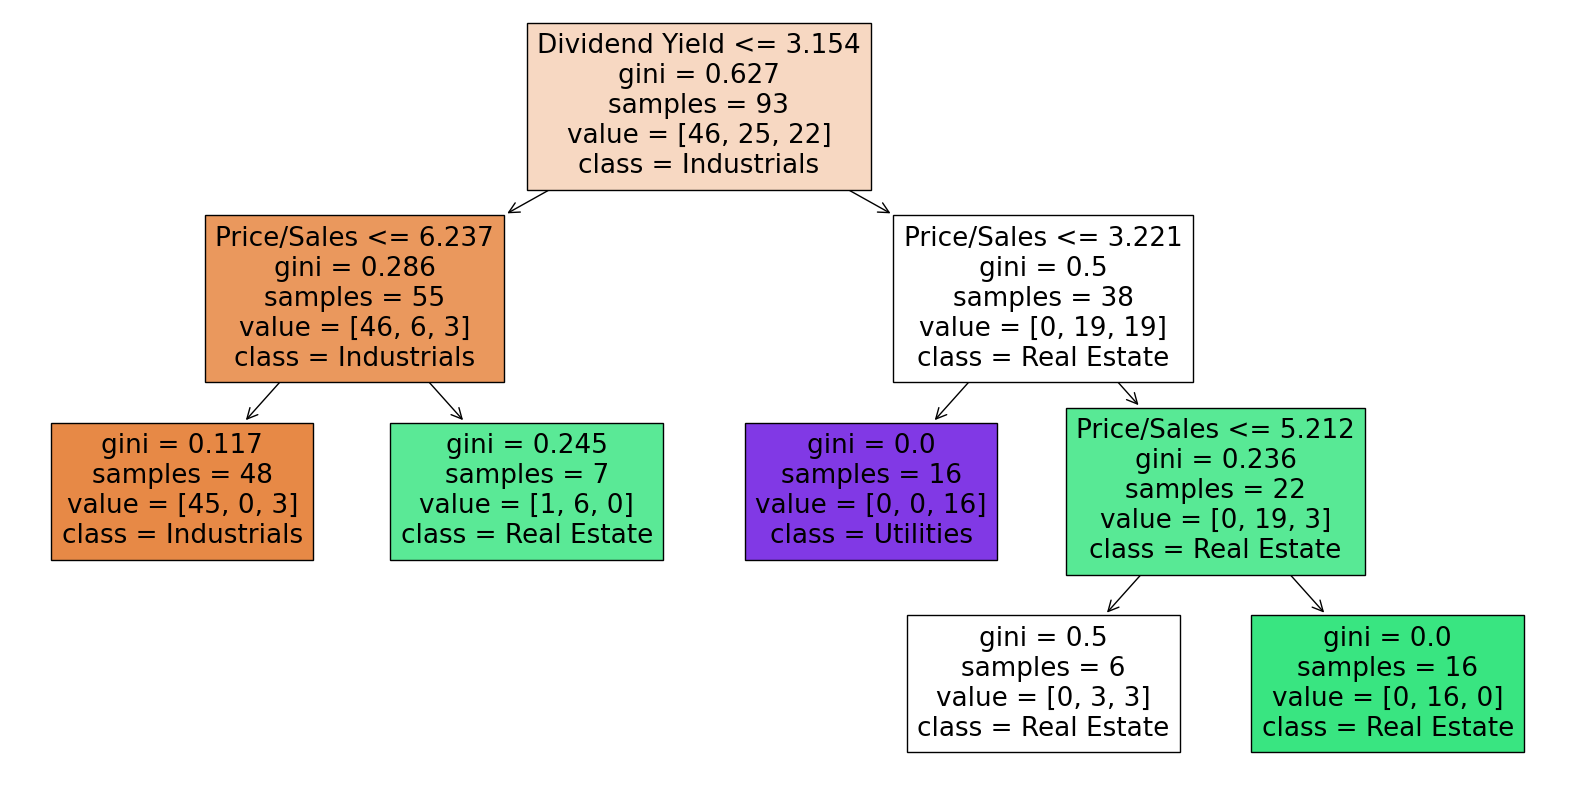

In [37]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf7, 
                   feature_names=clf7.feature_names_in_,
                   class_names=clf7.classes_,
                   filled=True)

Next let's make a chart of the results of our decision tree, which we will do by coloring the different decison areas in different colors using the DecisionBoundaryDisplay method. [Reference](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)

In order to get a proper coloring for our plot we need to use a similar trick with a dictionary before and afterwards we see the stocks and decision areas. I did not know how to get a legend for the colors of the scatterplot, because of the trick I used, but white stands for Industrials, black stands for Utilites and grey for Real Estate.

In [38]:
from sklearn.inspection import DecisionBoundaryDisplay 
import plotly.express as px

In [39]:
mapp = {'Industrials':0, 'Real Estate':1, 'Utilities':2}
df2["temp2"] = [mapp[i] for i in df2["Sector"]]

x=df2["Price/Sales"]
y=df2["Dividend Yield"]
z=df2["temp2"]

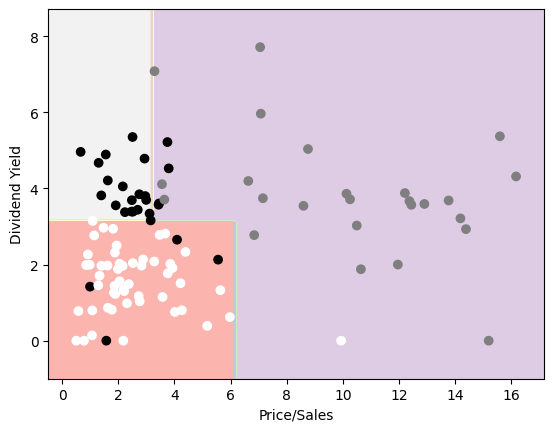

In [40]:
DecisionBoundaryDisplay.from_estimator(
        clf7,
        X,
        cmap='Pastel1'
    )
plt.scatter(x,y,c=z,cmap='binary')

## Linear Regression to predict the Price/Earnings multiple
The second central project is to look how the Price/Earnings multiple is influenced by current movements in the stock market.

First we add a new column to our dataframe which gives a multiple for the development of every stock over the last five years.

In [41]:
df["fy_move"]=df['2022']/df['2017']

Now we want to restrict the Price/Earnings multiple to the most common area between zero and fifty, as if we would take all values into account, the impact of the outliers would be to large. This makes sense, as a P/E ratio outside of that range would imply a very unusual economic situation of the company.

In [42]:
df['P/E']=df['Price/Earnings'][(df['Price/Earnings']>0) & (df['Price/Earnings']<50)]

By looking at the chart we see that there is a positive correlation between the P/E multiple and the movement over the last five years. This was what I expected, as a positive movement in the last five years increases the price of the stock and if we assume a symmetric distribution around zero for the development of earnings, on average the Price/Earnings multiple will go up.

In [43]:
alt.Chart(df).mark_circle().encode(
    x=alt.X("fy_move", axis=alt.Axis(format='00%', title='Five Year Movement')),
    y=alt.Y("P/E", axis=alt.Axis(title='Price/Earnings Multiple'))
)

alt.Chart(...)

Now let's check these results by using a linear regression. Note: The results can be only taken into account for usual P/E ratios between zero and fifty.

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regr = LinearRegression(fit_intercept=True)

In [46]:
data = {'P/E': df['P/E'],
        'fy_move': df['fy_move']
        }

In [72]:
df_mini = pd.DataFrame(data).dropna()
df_mini.shape
df_mini.head()

,P/E,fy_move
11,27.45,3.503858
26,9.92,0.419077
7,19.54,1.430643
41,16.86,6.639460
3,19.41,2.770679


In [48]:
regr.fit(df_mini[["fy_move"]],df_mini["P/E"]).coef_

array([2.25662875])

We see that if a stock has increased its price a hundred percentage points more in the last five years, it's P/E multiple is predicted to be 2.26 points higher.

In [49]:
df_mini['P/E_pred'] = regr.predict(df_mini[['fy_move']])

In [50]:
c4 = alt.Chart(df_mini).mark_circle().encode(
    x=alt.X("fy_move", axis=alt.Axis(format='00%', title='Five Year Movement')),
    y=alt.Y("P/E", axis=alt.Axis(title='Price/Earnings Multiple'))
)

c5 = alt.Chart(df_mini).mark_line(color="black", size=3).encode(
    x="fy_move",
    y="P/E_pred"
)

c4+c5

alt.LayerChart(...)

The line graph shows us the predicted values for our P/E multiple based on the performance of a stock in the last five years.

In [51]:
r_squared1 = regr.score(df_mini[["fy_move"]],df_mini["P/E"])
f'The R^2 value of our regression is {r_squared1}'

'The R^2 value of our regression is 0.10920701719531833'

Only around 7 percent of the P/E multiple is explained by the five year movement. So we try to add another variable. But to let it make sense, we now predict the five year movement based on two other multiples.

## Multivariate Regression to predict the Five Year Movement
We also calculate the Market Cap/EBITDA multiple. To make that multiple financially correct, we should use Enterprise Value instead of Market Cap (Equity Value), but as these values can't be derived from our data we use this multiple instead and restrict it to the usual values between zero and thirty.

In [75]:
df_mini["M"]=df["Market Cap"]/df["EBITDA"]

In [76]:
df_mini["M"]=df_mini["M"][(df_mini["M"]>0)&(df_mini["M"]<30)]
df_mini=df_mini.dropna()

We want to do a multivariable regression using the P/E multiple and the Market Cap/EBITDA multiple and do a three dimensional plot of the results.

In [54]:
reg = LinearRegression(fit_intercept=True)

In [55]:
reg.fit(df_mini[["M","P/E"]],df_mini["fy_move"])

LinearRegression()

In [78]:
df_mini['fy_pred'] = reg.predict(df_mini[["M","P/E"]])

In [57]:
r_squared = reg.score(df_mini[["M","P/E"]],df_mini["fy_move"])
f'The R^2 value of our regression is {r_squared}'

'The R^2 value of our regression is 0.1318268964774878'

The R^2 value shows us that only 13% of the the five year movement can be explained by our two multiple. So in general their doesn't seem to be a big linear correlation between our chosen variables. But at least our model is now twice as good as our first linear regression.

We try this using Matplotlib to plot the stocks and the prediction surface for the five year movement based on the Market Cap/EBITDA and the Price/Earnings multiples and our result is correct, but as we need to plot our graph in three dimensions, it is impossible to actually see the relevant information from this plot. [Reference 1](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) [Reference 2](https://stackoverflow.com/questions/57481995/how-to-generate-a-3d-triangle-surface-trisurf-plot-in-python-with-matplotlib)

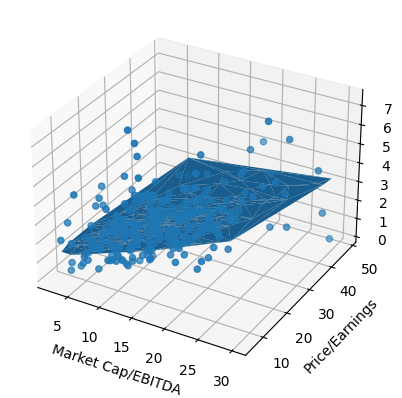

In [79]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_mini['M'],df_mini['P/E'],df_mini['fy_move'])
ax.set_xlabel('Market Cap/EBITDA')
ax.set_ylabel('Price/Earnings')
ax.set_zlabel('Five Year Movement')
ax.plot_trisurf(df_mini['M'],df_mini['P/E'],df_mini['fy_pred'])

Therefore I decided to use the plotly.grap_objects library which enables to do really nice and informative three-dimensional interactive charts. [Reference](https://stackoverflow.com/questions/69625661/create-a-3d-surface-plot-in-plotly)

In [59]:
from scipy.interpolate import griddata
import plotly.graph_objects as go


x = np.array(df_mini['M'])
y = np.array(df_mini['P/E'])
z = np.array(df_mini['fy_pred'])
a = np.array(df_mini['fy_move'])


xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X,Y = np.meshgrid(xi,yi)

Z = griddata((x,y),z,(X,Y), method='cubic')
A = griddata((x,y),a,(X,Y), method='cubic')

layout = go.Layout(
    margin=dict(l=80, r=80, t=100, b=80),scene= dict(
        xaxis_title='Market Cap/EBITDA',
        yaxis_title='Price/Earnings',
        zaxis_title='Five Year Movement'
    ))


fig = go.Figure(go.Surface(x=xi,y=yi,z=Z), layout=layout)
fig.add_scatter3d(x=X.flatten(), y=Y.flatten(), z = A. flatten(), mode='markers', 
                  marker=dict(size=2, color=A.flatten(),               
                              colorscale='darkmint'))
fig.show()


The color of the surface corresponds to the predicted five year movement and the legend for the colors is on the right side of the plot. Every point corresponds to a stock and shows the empirical five year movement of the respective stock. A darker green of a point symbolizes a higher five year movement of the corresponding stock. When going with the mouse over points you also see the values for the different axis.

From the surface we see, that the predicted five year movement is going up, when both multiples have higher values (positive correlation). 

## Stock Price Prediction
The last thing we wanna do in this project is to use a RandomForestRegressor to predict the 2022 stock prices of Utilities companies based on the five years before (2017,2022). [Reference](https://www.youtube.com/watch?v=BJ6kyj-st9k)

First we create a new dataframe consisting of the necessary data and make numpy arrays to use our RandomForestRegressor:

In [60]:
dfu = df[df['Sector']=="Utilities"]

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
x1,x2,x3,x4,x5,y=dfu["2017"],dfu["2018"],dfu["2019"],dfu["2020"],dfu["2021"],dfu["2022"]

In [63]:
x1,x2,x3,x4,x5=np.array(x1).reshape(-1,1),np.array(x2).reshape(-1,1),np.array(x3).reshape(-1,1),np.array(x4).reshape(-1,1),np.array(x5).reshape(-1,1)

In [64]:
x=np.concatenate((x1,x2,x3,x4,x5),axis=1)

We instantiate such a regressor, split our data and then fit the training data and predict the test data.

In [65]:
model=RandomForestRegressor(n_estimators=100, max_features=5, random_state=0)

In [66]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x, y, train_size=0.9, random_state=0)

In [67]:
model.fit(X1_train,y1_train)

RandomForestRegressor(max_features=5, random_state=0)

In [68]:
prediction = model.predict(X1_test)

In order to get a good plot, we need to get a dataframe, where we have columns with the actual data of the stocks in the testset and the predicted data in other columns.

In [69]:
df4=pd.DataFrame(X1_test)
df5=pd.DataFrame(prediction)
df6=pd.concat([df4,df5],axis=1)
df7=pd.DataFrame(y1_test.values)
df8=pd.concat([df4,df7],axis=1)


In [70]:
df_plot=pd.concat([df6,df8],axis=0).transpose()
df_plot["Year"]=range(2017,2023)
df_plot.columns = ["Prediction1","Prediction2","Prediction3","Actual1","Actual2","Actual3","Year"]
df_plot


,Prediction1,Prediction2,Prediction3,Actual1,Actual2,Actual3,Year
0,9.617868,86.187241,24.832394,9.617868,86.187241,24.832394,2017
1,9.477143,92.480362,25.914534,9.477143,92.480362,25.914534,2018
2,12.860688,96.775284,32.189873,12.860688,96.775284,32.189873,2019
3,18.765497,139.030411,43.180630,18.765497,139.030411,43.180630,2020
4,22.521595,119.689957,28.016165,22.521595,119.689957,28.016165,2021
0,29.926051,143.434947,41.327859,24.206093,131.990005,40.862453,2022


We see that there are three stocks in our testset. We want to plot the actual stock prices for these three stocks in red and the predicted stock data in blue. [Reference](https://github.com/altair-viz/altair/issues/968)

In [71]:
base = alt.Chart(df_plot.reset_index()).encode(x=alt.X('Year',scale=alt.Scale(domain=(2017,2022)), axis=alt.Axis(format='', title='Year')))
alt.layer(
    base.mark_line(color='blue').encode(y=alt.Y('Prediction1',axis=alt.Axis(title='Price'))),
    base.mark_line(color='red').encode(y='Actual1'),
    base.mark_line(color='blue').encode(y='Prediction2'),
    base.mark_line(color='red').encode(y='Actual2'),
    base.mark_line(color='blue').encode(y='Prediction3'),
    base.mark_line(color='red').encode(y='Actual3')
).interactive()


alt.LayerChart(...)

As we can see, the accuracy of RandomForestRegressor was quite different. The best result is achieved for the second stock, where you have to zoom in to see a difference between the red and the blue line. But I would say the overall result is quite good. Whether a stock went up or down was predicted right for all three stocks, eventhough two of them dropped in price the year before.

## Summary

To summarize we can say that both the K-Means algorithm and Decision Trees work quite well when it comes to classifying stocks by their sector. Using the optimal number for max_leaf_nodes, we get a slightly better result using Decision trees, but the difference is only four percentage points.
We also saw a small correlation between the past movement of a stock and some of the key financial metrics. Actually I expected an even bigger correaltion and was quite surprised by the low R^2 scores of the regressions.
When using a RandomForestRegressor to analyze stock price movements, we can get at least an idea into which direction the stock price will move next. How well our time series analysis predicted future stock prices was very different for different stocks.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://github.com/datasets/s-and-p-500-companies-financials/blob/master/data/constituents-financials.csv
https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/code

Full list of references including further sites helping with general ideas:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas
https://www.kaggle.com/questions-and-answers/169669
https://www.kaggle.com/code/kallefischer/sp-500-prediction-67-5-accuracy
https://stackoverflow.com/questions/57207108/typeerror-ufunc-isfinite-not-supported-for-the-input-types-and-the-inputs-co
https://stackoverflow.com/questions/57481995/how-to-generate-a-3d-triangle-surface-trisurf-plot-in-python-with-matplotlib
https://stackoverflow.com/questions/63697847/changing-label-names-of-kmean-clusters
https://www.youtube.com/watch?v=BJ6kyj-st9k
https://stackoverflow.com/questions/69625661/create-a-3d-surface-plot-in-plotly
https://pandas.pydata.org/docs/user_guide/reshaping.html
https://matplotlib.org/stable/tutorials/colors/colormaps.html
https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
https://github.com/altair-viz/altair/issues/968


## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b7c89e2-b326-479c-b0b9-d9986e29105a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>